In [ ]:
#11 .DECISION TREE
#Tasks1 Data Preparation:
#Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
data = pd.read_csv("heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display basic information
data.shape

(999, 13)

In [5]:
# Display first few rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [6]:
# Display column names
list(data.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [7]:
# Display data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


In [8]:
# Display summary statistics for numerical columns
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
#Task 2. Exploratory Data Analysis (EDA): Perform exploratory data analysis to understand the structure of the dataset.
#Check for missing values, outliers, and inconsistencies in the data.
#Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Check for missing values
data.isnull().sum()

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

In [11]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
duplicates

np.int64(90)

In [12]:
# Display basic statistics again for quick reference
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


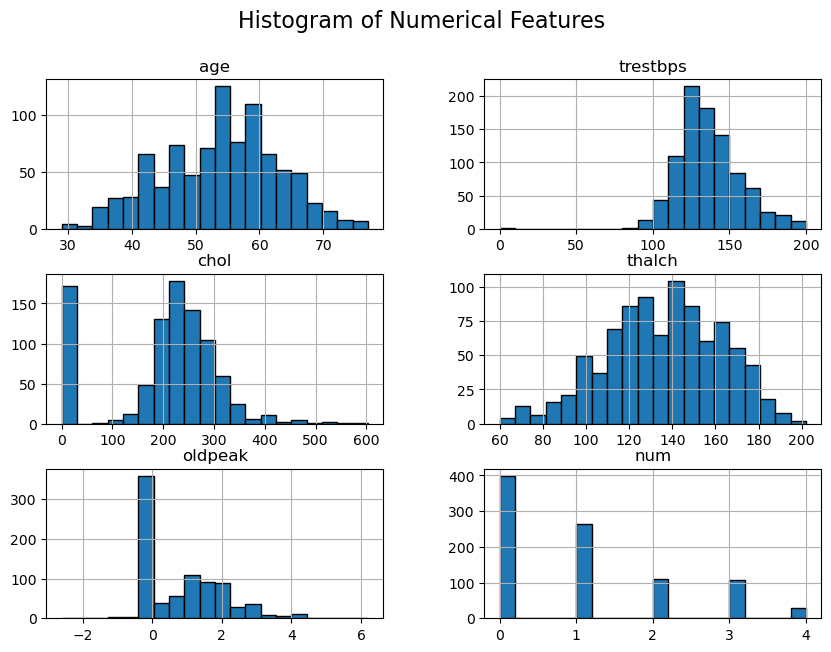

In [14]:
# Plot the distribution of each numerical feature
data.hist(figsize=(10, 7), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()

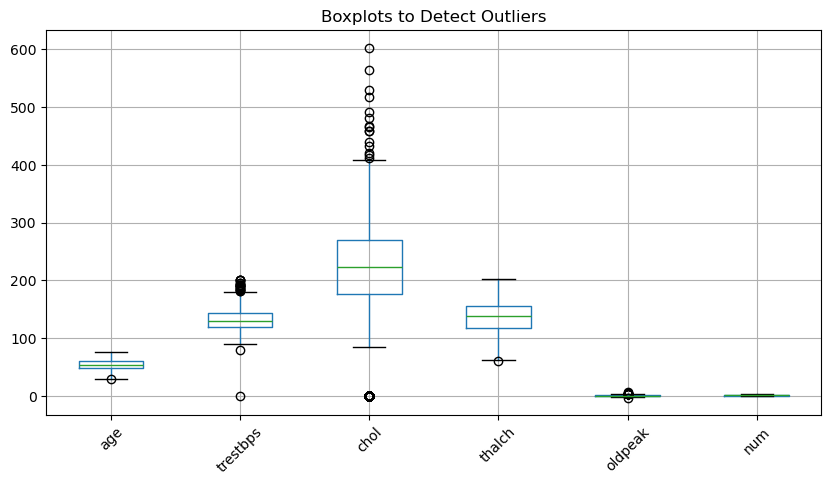

In [15]:
# Boxplots to detect outliers
numeric_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 5))
data[numeric_cols].boxplot()
plt.title("Boxplots to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_data

,age,trestbps,chol,thalch,oldpeak,num
0,63.0,145.0,233.0,150.0,2.3,0.0
1,41.0,135.0,203.0,132.0,0.0,0.0
2,57.0,140.0,192.0,148.0,0.4,0.0
3,52.0,118.0,186.0,190.0,0.0,0.0
4,57.0,110.0,201.0,126.0,1.5,0.0
...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN


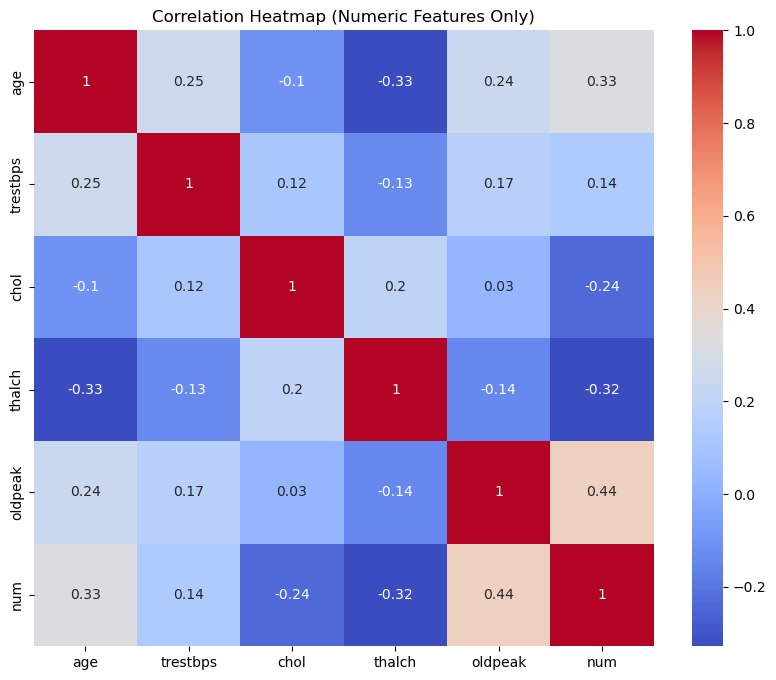

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [20]:
#3. Feature Engineering:
#If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
#Check for missing values again

In [23]:
data.isnull().sum()

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

In [24]:
# (Optional) Handle missing values — if any exist
# Example: fill numeric columns with median and categorical with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_8676\2032598017.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_8676\2032598017.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [25]:
# Missing Values After Handling
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [26]:
# Identify categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=[np.number]).columns

In [27]:
cat_cols

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [28]:
num_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [30]:
#Encode categorical variables
if len(cat_cols) > 0:
    print("\nEncoding categorical columns using Label Encoding...")
    le = LabelEncoder()
    for col in cat_cols:
        data[col] = le.fit_transform(data[col])
    print("Categorical variables encoded successfully!")


Encoding categorical columns using Label Encoding...
Categorical variables encoded successfully!


In [31]:
#Scale numerical features
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print("\n Numerical features scaled successfully!")


 Numerical features scaled successfully!


In [32]:
#Display the cleaned data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.053038,1,3,0.610437,0.275348,True,0,0.542393,0,1.445746,0,0,-0.924379
1,-1.468059,1,1,0.096682,-0.005005,False,1,-0.162173,0,-0.818356,1,0,-0.924379
2,0.365466,1,0,0.353560,-0.107801,False,1,0.464108,0,-0.424599,1,0,-0.924379
3,-0.207510,1,3,-0.776700,-0.163871,False,0,2.108096,0,-0.818356,1,0,-0.924379
4,0.365466,1,0,-1.187703,-0.023695,False,1,-0.397029,1,0.658232,1,0,-0.924379


In [40]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [45]:
# Define features (X) and target (y)
X = data.drop('num', axis=1)
y = data['num']

print(" Features (X) and Target (y) defined successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)


 Features (X) and Target (y) defined successfully!
X shape: (999, 12)
y shape: (999,)


In [48]:
#Separate features (X) and target (y)
if 'target' in data.columns:
    X = data.drop('target', axis=1)
    y = data['target']
    print("\n Features and target separated.")
    print("X shape:", X.shape)
    print("y shape:", y.shape)
else:
    print("\n 'target' column not found. Please check the dataset.")


 'target' column not found. Please check the dataset.


In [49]:
#4. Decision Tree Classification:
#Split the dataset into training and testing sets (e.g., using an 80-20 split).
#Implement a Decision Tree Classification model using a library like scikit-learn.
#Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics
#(e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Split the dataset (80% train, 20% test)
X = data.drop('num', axis=1)
y = data['num']

In [51]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(799, 12)

In [54]:
X_test.shape

(200, 12)

In [56]:
# Convert target variable to binary classes
y = np.where(data['num'] > 0, 1, 0)

In [57]:
np.unique(y)

array([0, 1])

In [58]:
X = data.drop('num', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
#  Make predictions
y_pred = dt_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [61]:
#  Evaluate model performance
print("\n Model Evaluation Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_pred), 4))


 Model Evaluation Metrics:
Accuracy: 0.74
Precision: 0.4898
Recall: 0.4706
F1 Score: 0.48
ROC AUC: 0.6514


In [62]:
#  Classification Report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.83      0.83       149\n           1       0.49      0.47      0.48        51\n\n    accuracy                           0.74       200\n   macro avg       0.66      0.65      0.65       200\nweighted avg       0.74      0.74      0.74       200\n'

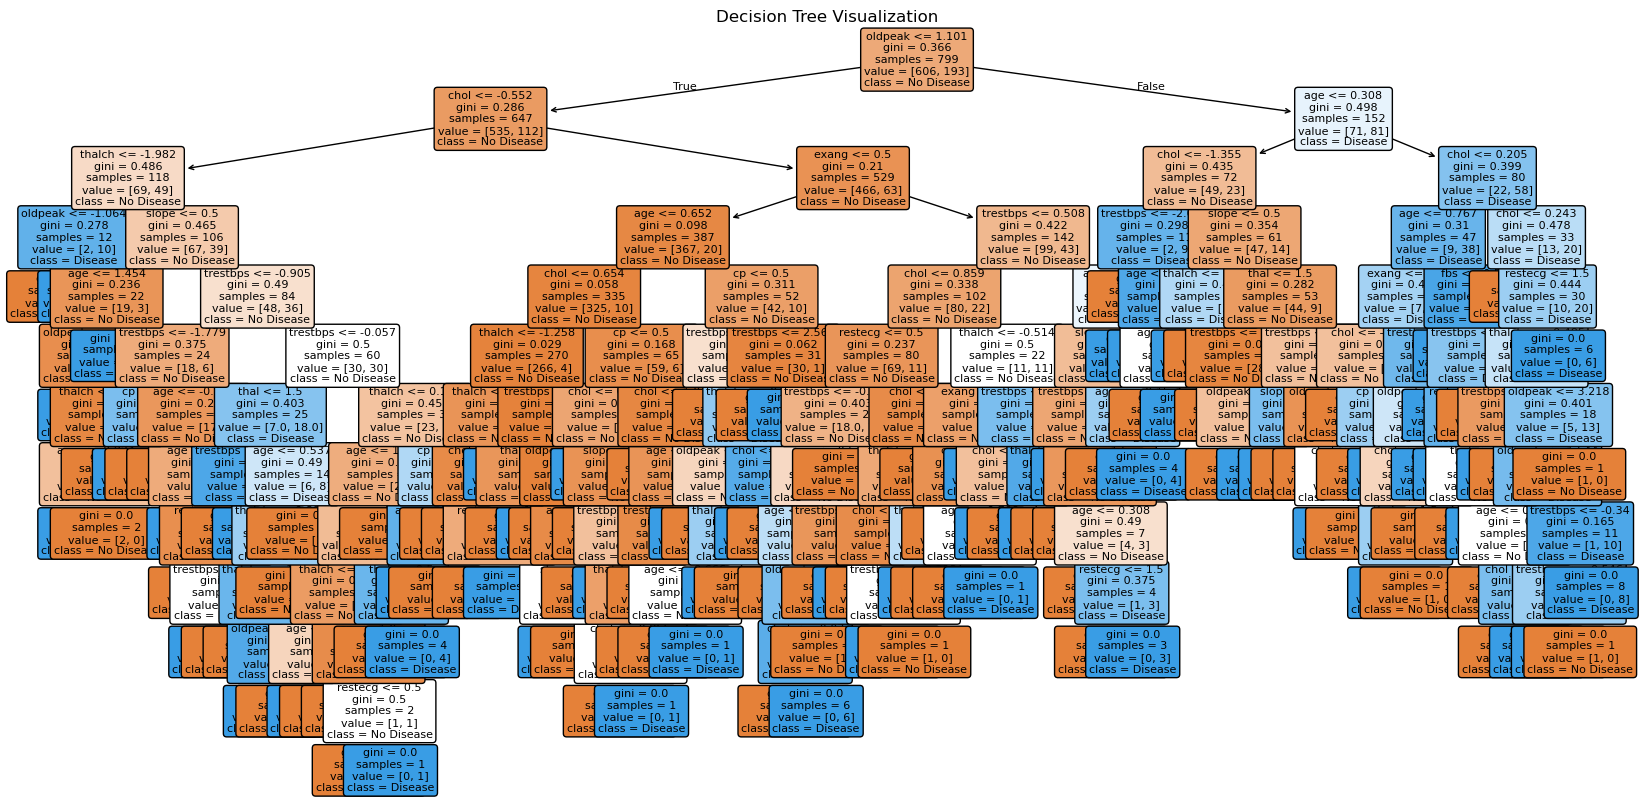

In [63]:
#  Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization")
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # splitting criteria
    'max_depth': [2, 4, 6, 8, 10, None],           # controls tree depth
    'min_samples_split': [2, 5, 10],               # min samples to split a node
    'min_samples_leaf': [1, 2, 4]                  # min samples in a leaf node
}

In [66]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # evaluate based on accuracy
    n_jobs=-1,              # use all CPU cores
    verbose=1               # show progress
)

In [67]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [68]:
# Get best parameters and model
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

In [69]:
best_params

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [70]:
best_dt_model 

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [72]:
# Evaluate the tuned model
y_pred_best = best_dt_model.predict(X_test)
y_pred_best

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [73]:
print("\n Tuned Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_best), 4))
print("Precision:", round(precision_score(y_test, y_pred_best), 4))
print("Recall:", round(recall_score(y_test, y_pred_best), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_best), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_pred_best), 4))


 Tuned Model Performance:
Accuracy: 0.78
Precision: 0.8182
Recall: 0.1765
F1 Score: 0.2903
ROC AUC: 0.5815


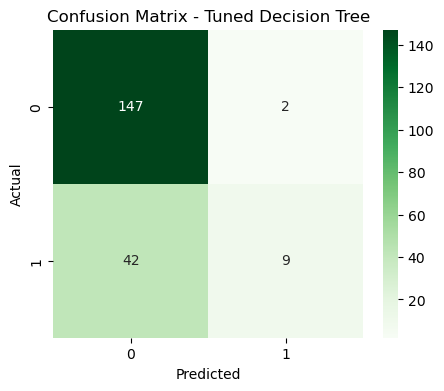

In [74]:
# Confusion Matrix for tuned model
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

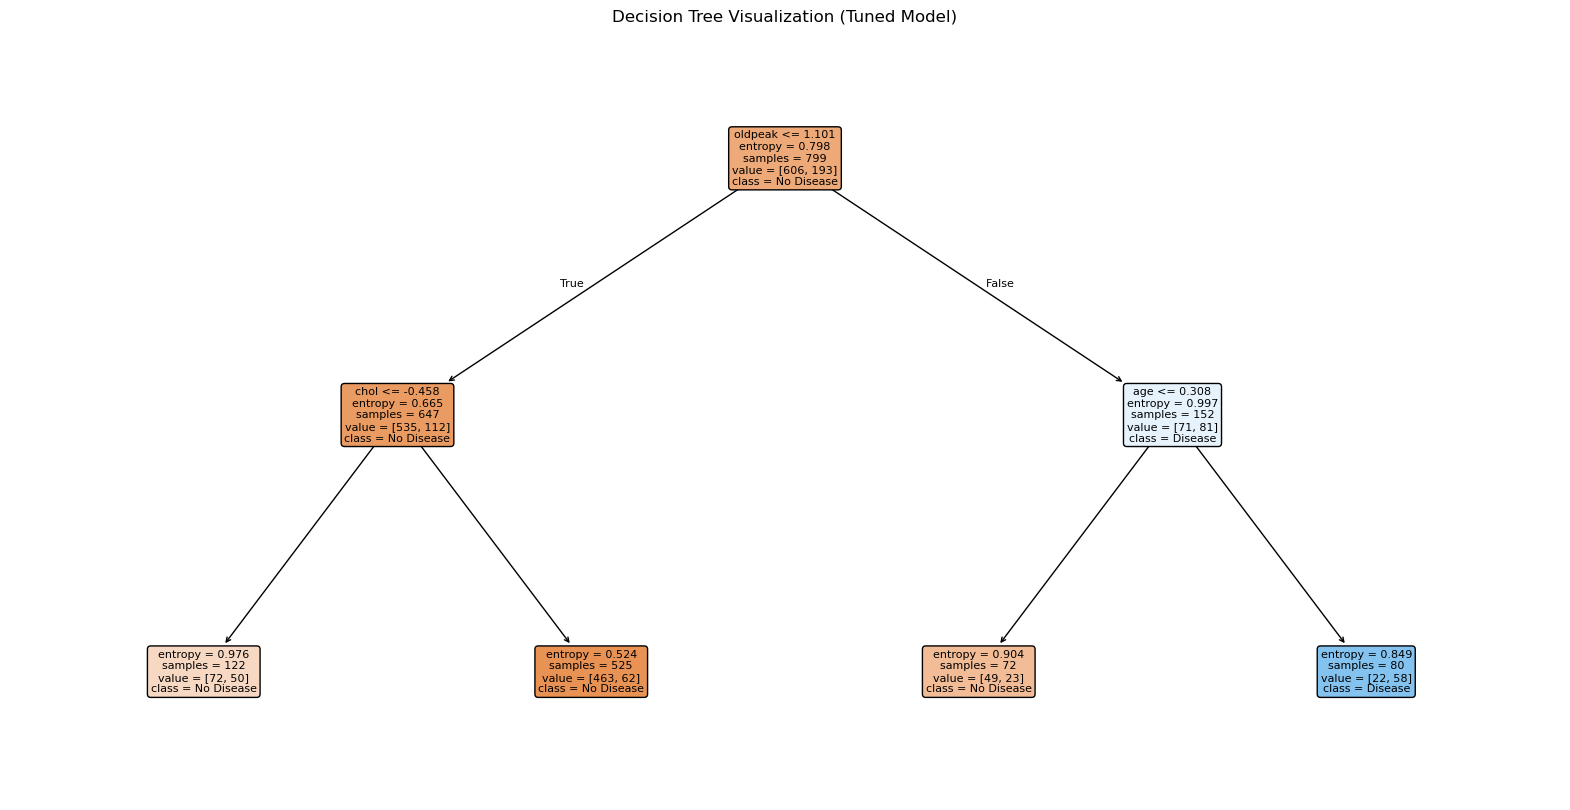

In [75]:
# Visualize the tuned tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Visualization (Tuned Model)")
plt.show()

In [ ]:
#6. Model Evaluation and Analysis:
#Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
#Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [76]:
# Make predictions
y_pred_final = best_dt_model.predict(X_test)

In [77]:
y_pred_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [78]:
# Evaluation Metrics
print("\n Final Model Evaluation Metrics:")
print("Accuracy :", round(accuracy_score(y_test, y_pred_final), 4))
print("Precision:", round(precision_score(y_test, y_pred_final), 4))
print("Recall   :", round(recall_score(y_test, y_pred_final), 4))
print("F1 Score :", round(f1_score(y_test, y_pred_final), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_pred_final), 4))


 Final Model Evaluation Metrics:
Accuracy : 0.78
Precision: 0.8182
Recall   : 0.1765
F1 Score : 0.2903
ROC AUC  : 0.5815


In [79]:
classification_report(y_test, y_pred_final)

'              precision    recall  f1-score   support\n\n           0       0.78      0.99      0.87       149\n           1       0.82      0.18      0.29        51\n\n    accuracy                           0.78       200\n   macro avg       0.80      0.58      0.58       200\nweighted avg       0.79      0.78      0.72       200\n'

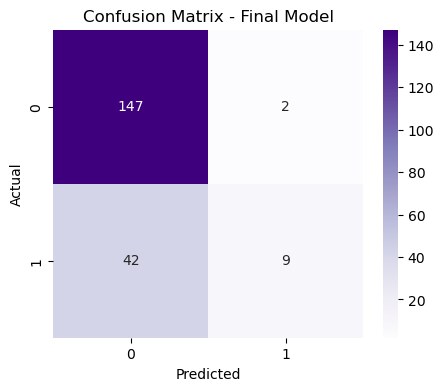

In [80]:
# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [81]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🌿 Top Important Features:")
print(importances.head())


🌿 Top Important Features:
    Feature  Importance
9   oldpeak    0.505192
4      chol    0.326281
0       age    0.168527
1       sex    0.000000
3  trestbps    0.000000


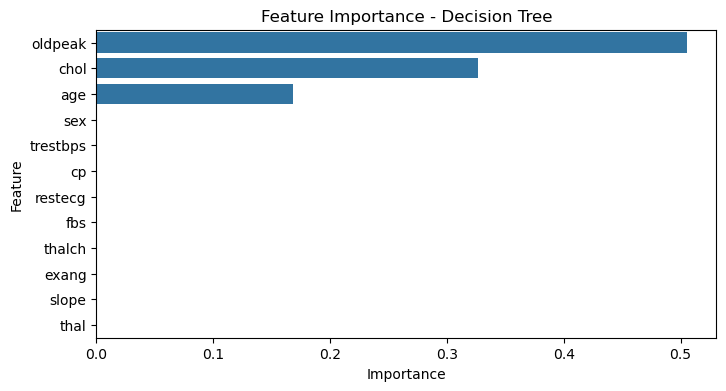

In [83]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("Feature Importance - Decision Tree")
plt.show()

In [84]:
# Visualize ROC Curve
from sklearn.metrics import roc_curve

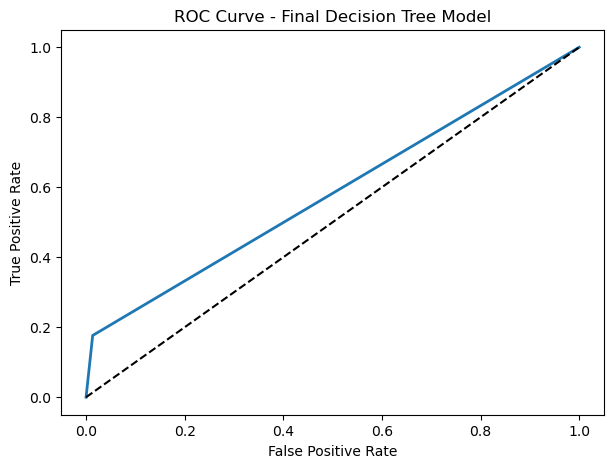

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Final Decision Tree Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()